In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
def Normalize(df):
    return (df-df.min())/(df.max()-df.min())

In [4]:
df = pd.read_csv('D:\\malware\\output.csv')

# Strip wouldn't remove ' or whitespace for some reason. 
#df['imports'] = df['imports'].apply(lambda i: i.strip('[]').replace("'", "").replace(" ", "").split(','))
#df['exports'] = df['exports'].apply(lambda i: i.strip('[]').replace("'", "").replace(" ", "").split(','))
#df['file_type'] = df['file_type'].apply(lambda x: x.split())


# Split the sections string into the list of sections. 
#df['sections'] = df['sections'].apply(lambda i: i.replace('[','').replace(']]', '').split('],'))
#for it, sect in enumerate(df['sections']):
    # For each section, split the fields, and convert the last 5 into ints. 
#    for s in sect:
#        # We do a reverse split with max splits of 5 due to some of the first fields 
#        # having commas in them. 
#        s = s.replace(' ', '').rsplit(',', 5)
#        for i, x in enumerate(s[1:]):
##            s[i+1] = int(x)
#        df['sections'][it] = s
        

df.head(3)

,index,label,file_type,file_size,file_entropy,imports,exports,size_of_image,size_of_code,size_of_stack_reserve,size_of_stack_commit,size_of_heap_reserve,size_of_heap_commit,number_of_sections,sections
0,89169,1,"PE32 executable (DLL) (GUI) Intel 80386, for M...",85504,5.838923,"['LocalAlloc', 'FreeLibrary', 'GetProcAddress'...",[],139264,29696,1048576,4096,1048576,4096,6,"[['.text\x00\x00\x00', 29696, 29442, 1, 1, 0],..."
1,257486,0,PE32+ executable (GUI) x86-64 Mono/.Net assemb...,220104,6.045378,[],[],212992,196608,4194304,16384,1048576,8192,2,"[['.text\x00\x00\x00', 196608, 194161, 1, 1, 0..."
2,383209,1,"PE32 executable (GUI) Intel 80386, for MS Windows",1130400,5.937736,"['AccessibleObjectFromWindow', 'InterlockedInc...",[],1134592,262144,1048576,4096,1048576,4096,5,"[['.text\x00\x00\x00', 262144, 261943, 1, 1, 0..."


<AxesSubplot:xlabel='file_type'>

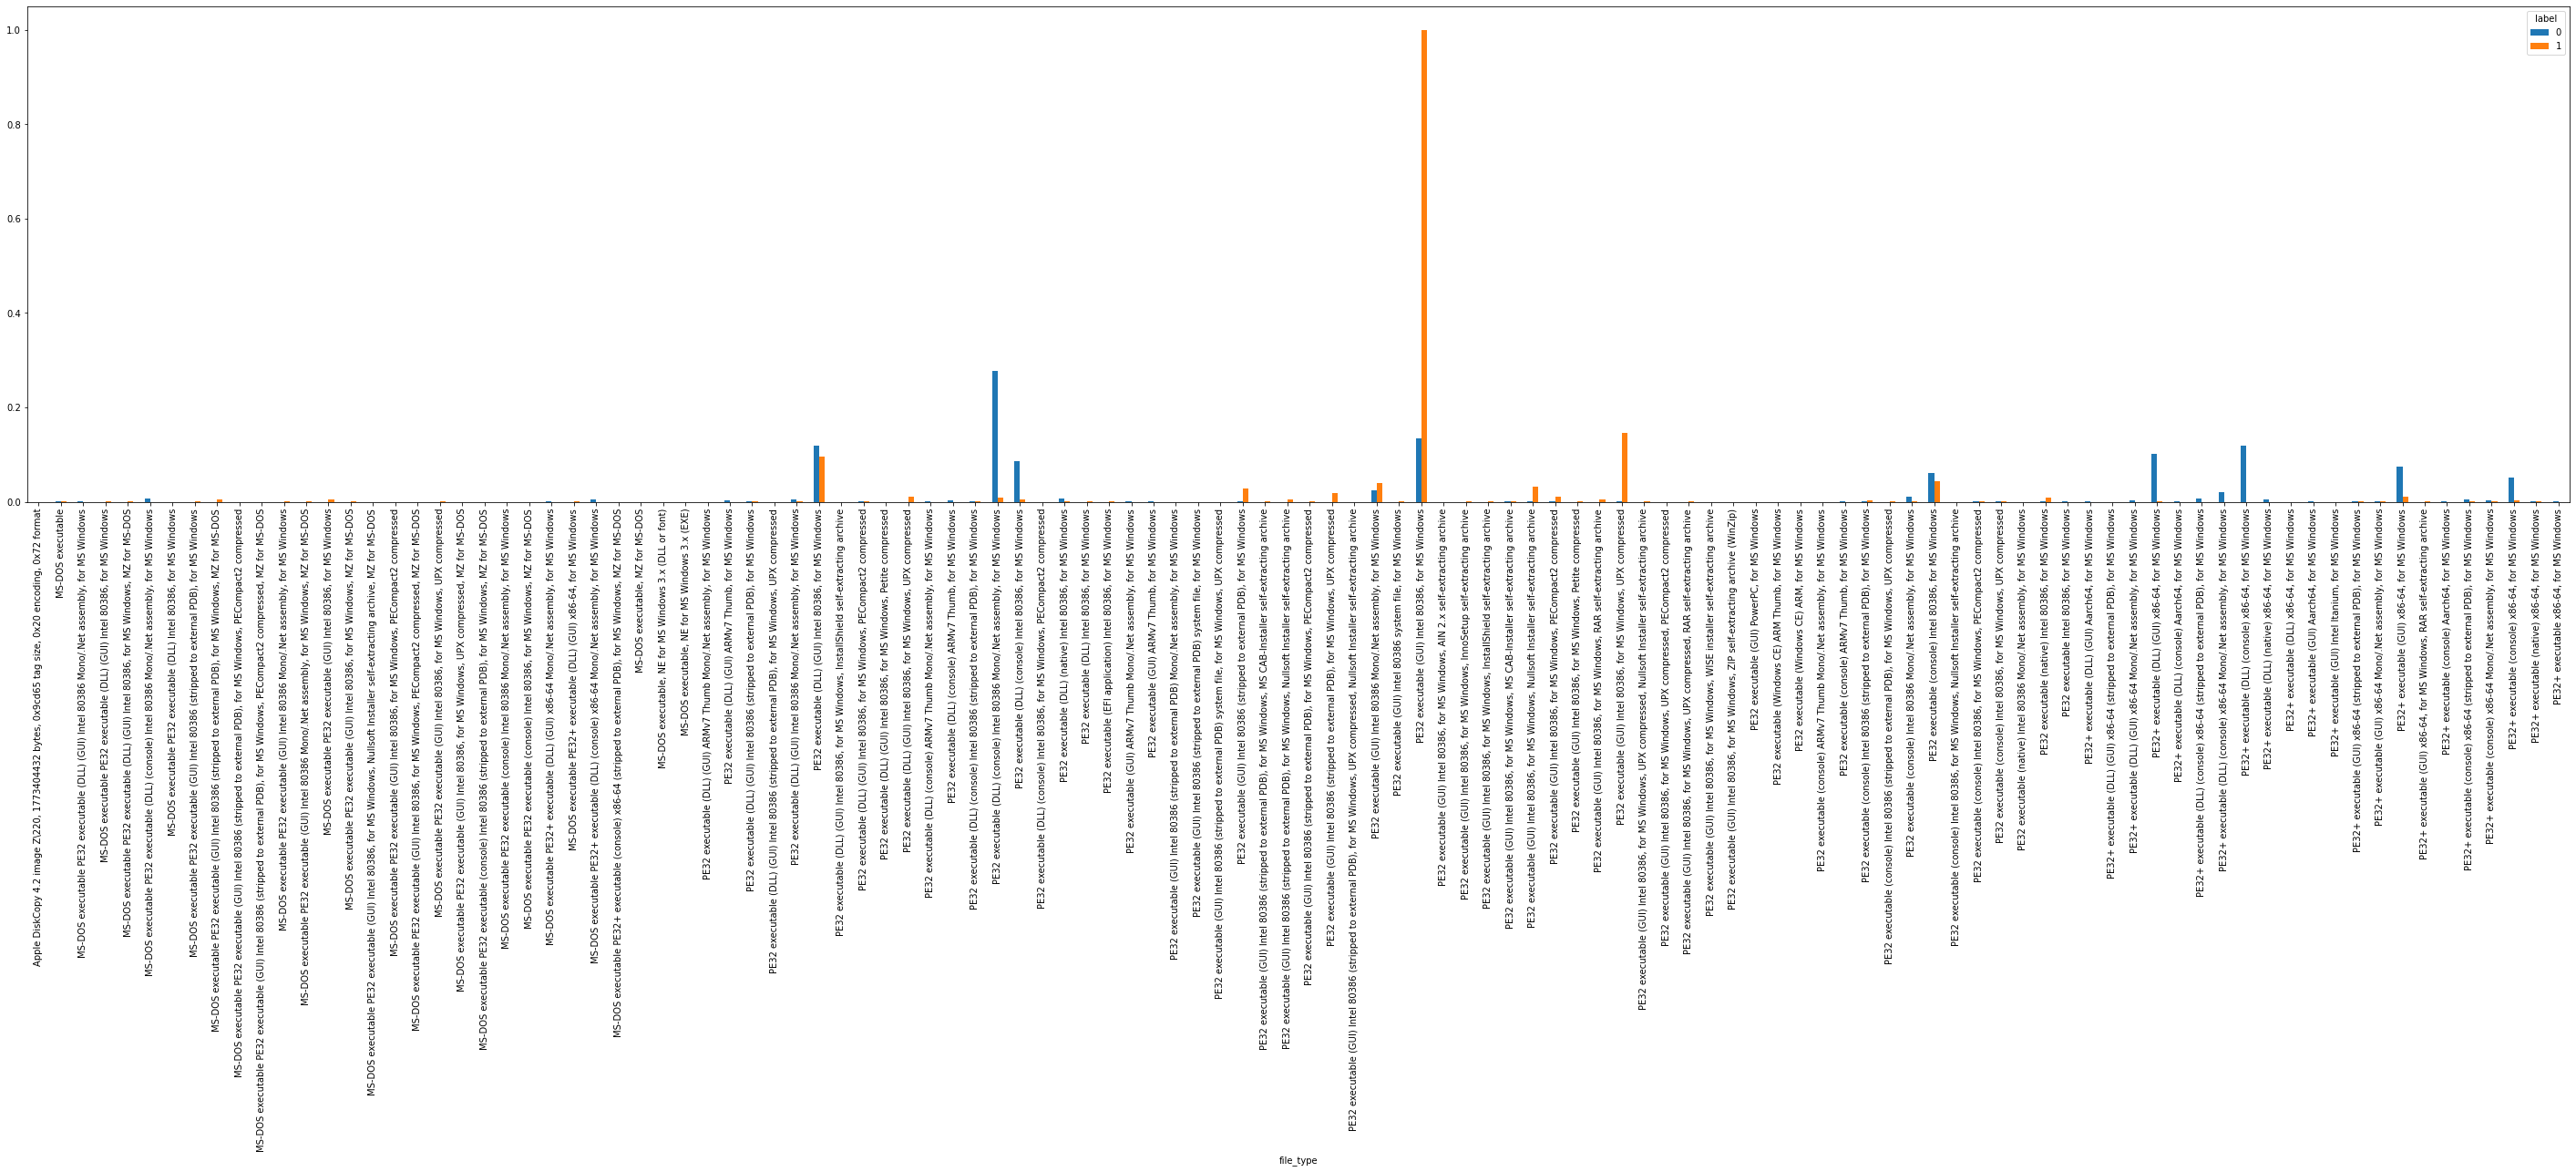

In [5]:
file_type = df.groupby(['file_type', 'label']).size().reset_index(name='count')
#file_type = file_type[file_type['count'] > 3]
file_type['count'] = Normalize(file_type['count'])
file_type = file_type.pivot(index='file_type', columns='label', values='count')
file_type.plot.bar(
    figsize=(50,10), 
)

In [6]:
word_count = {'good': {}, 'bad': {}}
file_type = df.groupby(['file_type', 'label']).size().reset_index(name='count')
for _, row in file_type.iterrows():
    for word in row['file_type'].split():
        if row['label'] == 0:
            if word in word_count['good']:
                word_count['good'][word] += row['count']
            else:
                word_count['good'][word] = row['count']
        else:
            if word in word_count['bad']:
                word_count['bad'][word] += row['count']
            else:
                word_count['bad'][word] = row['count']

words = pd.DataFrame(word_count)
words.head()

,good,bad
MS-DOS,485.0,774.0
executable,40606.0,53282.0
PE32,26156.0,52156.0
(DLL),26925.0,4470.0
(GUI),16466.0,50002.0


In [7]:
type_vocab = list(set(x.strip(',') for l in df['file_type'] for x in l))
print(type_vocab)

['', 'w', 'a', 's', 'B', 'm', '\\', '8', '1', '6', 'u', 'C', 'e', '-', 'A', '2', 'b', '+', 'f', 'r', 'c', 'W', 'L', '5', 'k', '.', 'x', 'N', 'Z', 'z', 'R', 'g', 'h', 'M', 'P', '9', 'F', 'D', 'n', '4', '3', 'l', 'E', '(', 't', 'U', 'S', ')', 'o', ' ', 'i', 'y', '0', 'p', 'T', 'v', 'd', 'X', 'I', 'O', '7', 'G', '/']


In [8]:
words.loc['UPX']

good      37.0
bad     6229.0
Name: UPX, dtype: float64

Text(0, 0.5, 'Density')

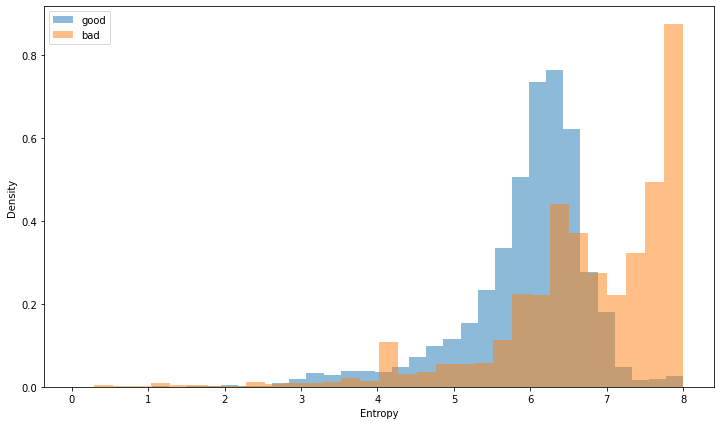

In [9]:
entropy = df[['file_entropy', 'label']]
good = entropy[entropy['label'] == 0]
bad = entropy[entropy['label'] == 1]
plt.figure(figsize=(12,7))
plt.hist(
    x=good['file_entropy'],
    density=True,
    bins=32,
    alpha=0.5
)
plt.hist(
    x=bad['file_entropy'],
    density=True,
    bins=32,
    alpha=0.5
)
plt.legend(['good', 'bad'])
plt.xlabel('Entropy')
plt.ylabel('Density')


Text(0, 0.5, 'Density')

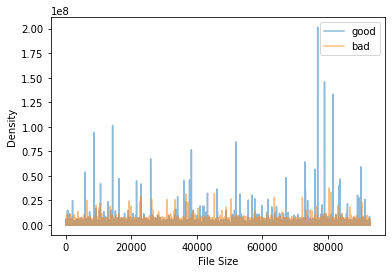

In [10]:
size = df[['file_size', 'label']]
good = size[size['label'] == 0]
bad = size[size['label'] == 1]
good['file_size'].plot(alpha=0.5)
bad['file_size'].plot(alpha=0.5)
plt.legend(['good', 'bad'])
plt.xlabel('File Size')
plt.ylabel('Density')

<AxesSubplot:xlabel='file_size', ylabel='size_of_image'>

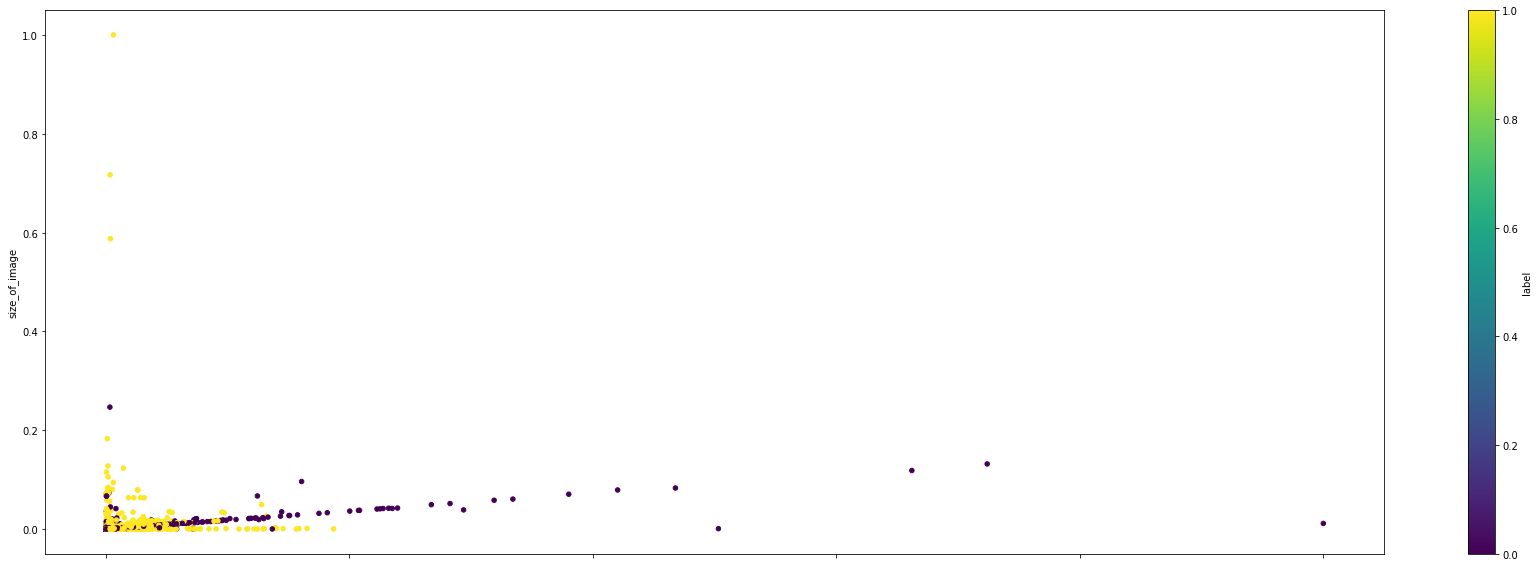

In [11]:
size = df[['file_size', 'size_of_image', 'label']]
size = Normalize(size)
good = size[size['label'] == 0]
bad = size[size['label'] == 1]
size.plot.scatter(
    x='file_size',
    y='size_of_image',
    c='label', 
    colormap='viridis',
    figsize=(30,10)
)

<AxesSubplot:title={'center':'file_size'}, xlabel='label'>

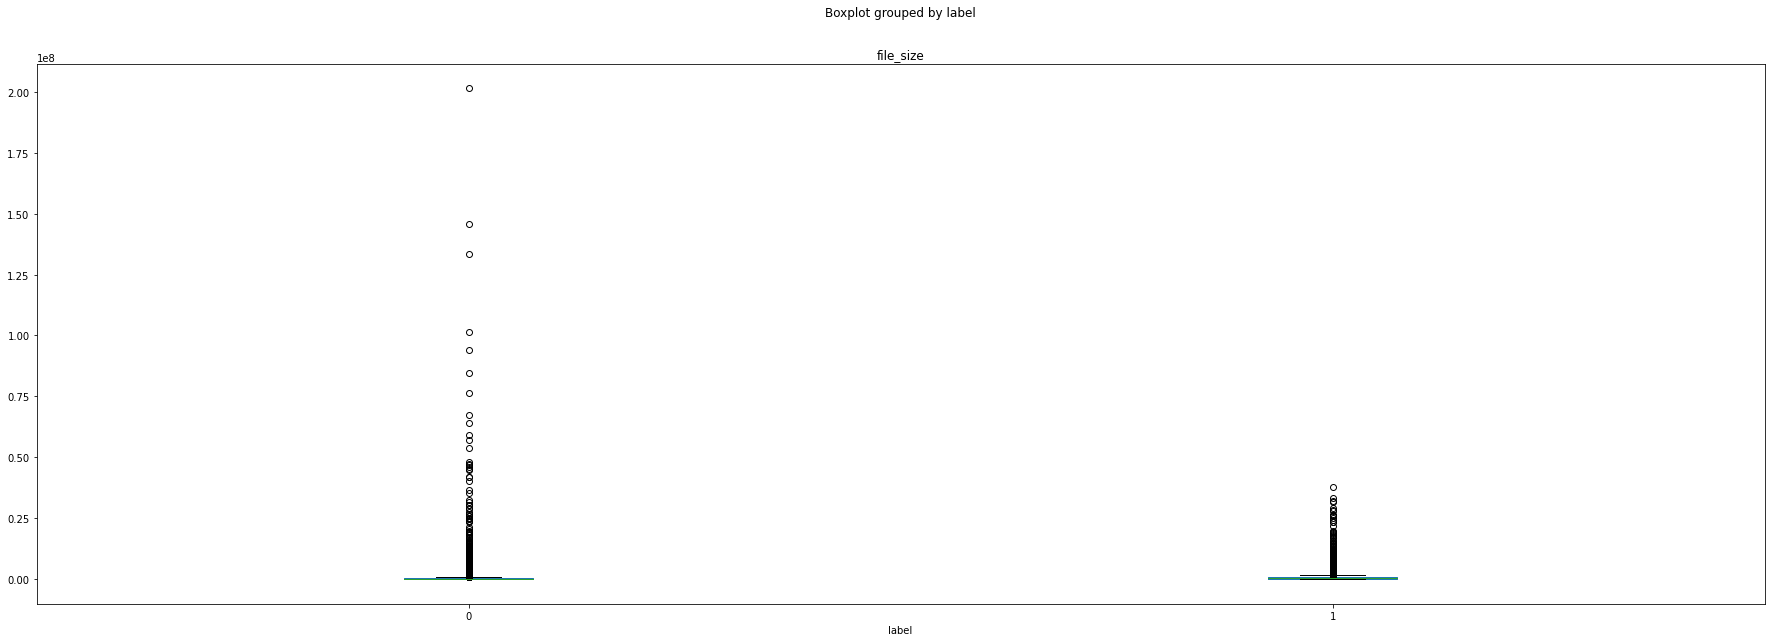

In [12]:
size = df[['file_size', 'size_of_image', 'label']]
#size = Normalize(size)
size.boxplot(
    column=['file_size'],
    by='label',
    grid=False,
    figsize=(30,10)
)

Text(0, 0.5, 'Density')

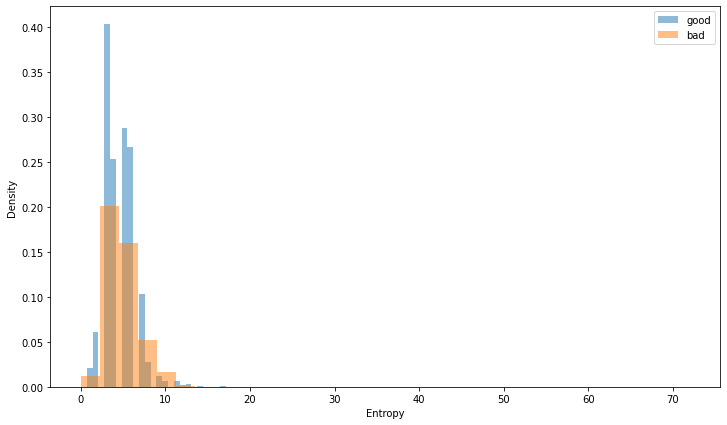

In [13]:
size = df[['number_of_sections', 'label']]
good = size[size['label'] == 0]
bad = size[size['label'] == 1]
plt.figure(figsize=(12,7))
plt.hist(
    x=good['number_of_sections'],
    density=True,
    bins=32,
    alpha=0.5
)
plt.hist(
    x=bad['number_of_sections'],
    density=True,
    bins=32,
    alpha=0.5
)
plt.legend(['good', 'bad'])
plt.xlabel('Entropy')
plt.ylabel('Density')

In [14]:
import_vocab = list(set(x for l in df['imports'] for x in l))
max = 0
for i in df['imports']:
    if len(i) > max:
        max = len(i)
print(df.imports.describe())
print('Maximum length of list: ', max)
print('Minimum length of list: 0')
print('vocab_size: ', len(import_vocab))

count               92898
unique              33751
top       ['_CorDllMain']
freq                 9395
Name: imports, dtype: object
Maximum length of list:  1018291
Minimum length of list: 0
vocab_size:  73
